### Random Forests Example 3.1
We again study the **heart** data but only consider the two predictors **age** and **maxHR**. We compute a random forest model and an ordinary tree and compare the partition of the two-dimensional predictor space according to where the models predit **AHD=yes** and **AHD=no**. We start by computing the models and defining a grid in the predictor space where we evaluate the resulting models. In fact, since we have only two predictors, we use a bagged model.  

We define the variables, Tree-controls and create and fit the Decision-Tree and Random Forest model.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)
df['ChestPain'], ChestPain_codes = pd.factorize(df['ChestPain'])
df['Thal'], Thal_codes = pd.factorize(df['Thal'])
# Drop NA rows:
df.dropna(inplace=True)

X = df[['Age', 'MaxHR']]
y = df['AHD_Yes']

n_features = X.shape[1]

# Tree controlls for RF
rfc_settings = {'oob_score': True, 
                'max_features': np.sqrt(n_features)/n_features,
                'random_state': 1, 
                'n_estimators': 200}
tree_settings = {'criterion': 'entropy',
                 'min_samples_split': 10,
                 'min_samples_leaf': 5,
                 'min_impurity_decrease': 0.01,
                 'random_state': 1}

rfc = RandomForestClassifier().set_params(**rfc_settings)
tree = tree.DecisionTreeClassifier().set_params(**tree_settings)
rfc.fit(X, y)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

Now a grid is created, and each point on the grid is predicted using the classifiers. The class predicted by each classifier is visualised in a plot. 

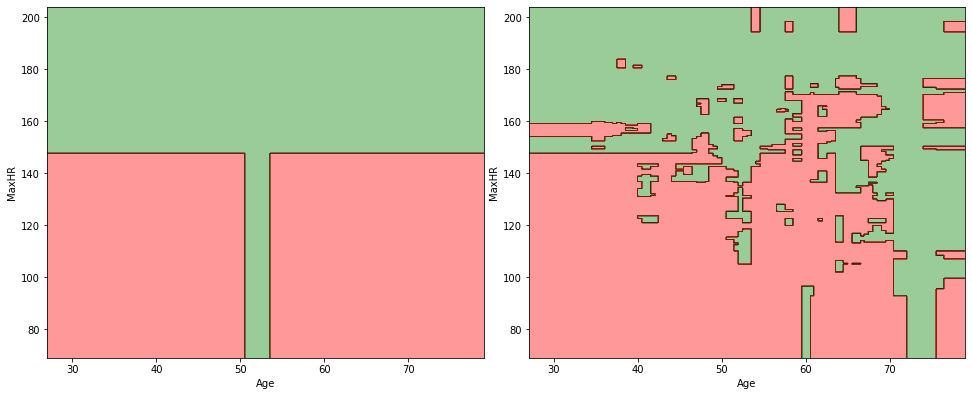

In [2]:
# Create grid
margin, n = 2, 400
xx = np.linspace(min(X['Age']) - margin, max(X['Age']) + margin, n)
yy = np.linspace(min(X['MaxHR']) - margin, max(X['MaxHR']) + margin, n)
yy, xx = np.meshgrid(yy, xx)

# Predict
Ztree = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Zrfc = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Ztree = Ztree.reshape(xx.shape)
Zrfc = Zrfc.reshape(xx.shape)

# Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot surface
ax[0].contourf(xx, yy, Ztree,
               colors=['green', 'black', 'red', 'black'], alpha=0.4)
ax[1].contourf(xx, yy, Zrfc,
               colors=['green', 'black', 'red', 'black'], alpha=0.4)

ax[0].set_xlabel('Age'), ax[1].set_xlabel('Age')
ax[0].set_ylabel('MaxHR'), ax[1].set_ylabel('MaxHR')
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)    
plt.show()

As it can be seen, the partition due to the random forest is much more complicated and harder to interpret as the simple binary partition of the tree. The predictive power, however, is larger for the random forest model.  